# PROYECTO PYTHON *MODELANDO UNA REGRESIÓN*

### MARLON RAMOS, 17011777

# SOLUCIÓN

In [36]:
#Importando las librerias a utilizar en el proyecto
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Carga de los datos para el modelo de regresión

In [2]:
#cargando el archivo proyecto_training_data.npy
#Sera necesario, trabajarlo en numpy
numpy_data = np.load('proyecto_training_data.npy')

In [37]:
#pasarlo de pandas hacia un DataFrame
df = pd.DataFrame(numpy_data)

#desplegarlo (5 rows)
df.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.


OverallQual: Overall material and finish quality, rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
       
       
1stFlrSF: First Floor square feet
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
YearBuilt: Original construction date
LotFrontage: Linear feet of street connected to property


In [38]:
# Coloca nombre a las columnas
df.columns=['SalePrice', 'OverallQual', '1stFLrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
df.head()

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [39]:
#Estadisticos
df.describe()

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [40]:
df.info()
# Los datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFLrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [42]:
#Nota: **Se informo que los datos se deben IMPUTAR LA MEDIA**
media_columna = df['LotFrontage'].mean()
df['LotFrontage'] = df['LotFrontage'].fillna(media_columna)

In [8]:
#df ahora no tiene valores null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1460 non-null   float64
 1   OverallQual   1460 non-null   float64
 2   1stFLrSF      1460 non-null   float64
 3   TotRmsAbvGrd  1460 non-null   float64
 4   YearBuilt     1460 non-null   float64
 5   LotFrontage   1460 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [45]:
# Partición de datos en Train: 80% para Test: 20%

numpy_data_not_null = df.values 

filas, columnas = numpy_data_not_null.shape 
print("filas: ",filas," columnas: ",columnas)

indice_division = int(filas * 0.8) 

#Nota: los sets 80% y 20%; slicing según lo indicado
train_set = numpy_data_not_null[ :indice_division, : ]
test_set = numpy_data_not_null[indice_division:, :]

filas:  1460  columnas:  6


In [46]:
train_df = pd.DataFrame(train_set) 
test_df  = pd.DataFrame(test_set)

In [47]:
# nuevos Títulos
train_df.columns=['SalePrice', 'OverallQual', '1stFLrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
train_df

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.000000
1,181500.0,6.0,1262.0,6.0,1976.0,80.000000
2,223500.0,7.0,920.0,6.0,2001.0,68.000000
3,140000.0,7.0,961.0,7.0,1915.0,60.000000
4,250000.0,8.0,1145.0,9.0,2000.0,84.000000
...,...,...,...,...,...,...
1163,108959.0,4.0,1258.0,6.0,1969.0,60.000000
1164,194000.0,5.0,1432.0,5.0,1978.0,70.049958
1165,233170.0,7.0,1502.0,7.0,2009.0,79.000000
1166,245350.0,8.0,1694.0,7.0,2008.0,64.000000


In [48]:
# Títulos según test_df
test_df.columns=['SalePrice', 'OverallQual', '1stFLrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage']
test_df

,SalePrice,OverallQual,1stFLrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
...,...,...,...,...,...,...
287,175000.0,6.0,953.0,7.0,1999.0,62.0
288,210000.0,6.0,2073.0,7.0,1978.0,85.0
289,266500.0,7.0,1188.0,9.0,1941.0,66.0
290,142125.0,5.0,1078.0,5.0,1950.0,68.0


In [51]:
''' 
# Estadisticos parte uno
media_train_df  = train_df.mean()
maximo_train_df = train_df.max()
minimo_train_df = train_df.min()
rango_train_df  = maximo_train_df - minimo_train_df
std_train_df    = train_df.std()
'''

' \n# Estadisticos parte uno\nmedia_train_df  = train_df.mean()\nmaximo_train_df = train_df.max()\nminimo_train_df = train_df.min()\nrango_train_df  = maximo_train_df - minimo_train_df\nstd_train_df    = train_df.std()\n'

In [52]:
'''
# Estadisticos parte dos
media_test_df  = test_df.mean()
maximo_test_df = test_df.max()
minimo_test_df = test_df.min()
rango_test_df  = maximo_test_df - minimo_train_df
std_test_df    = test_df.std()
'''

'\n# Estadisticos parte dos\nmedia_test_df  = test_df.mean()\nmaximo_test_df = test_df.max()\nminimo_test_df = test_df.min()\nrango_test_df  = maximo_test_df - minimo_train_df\nstd_test_df    = test_df.std()\n'

# Graficas

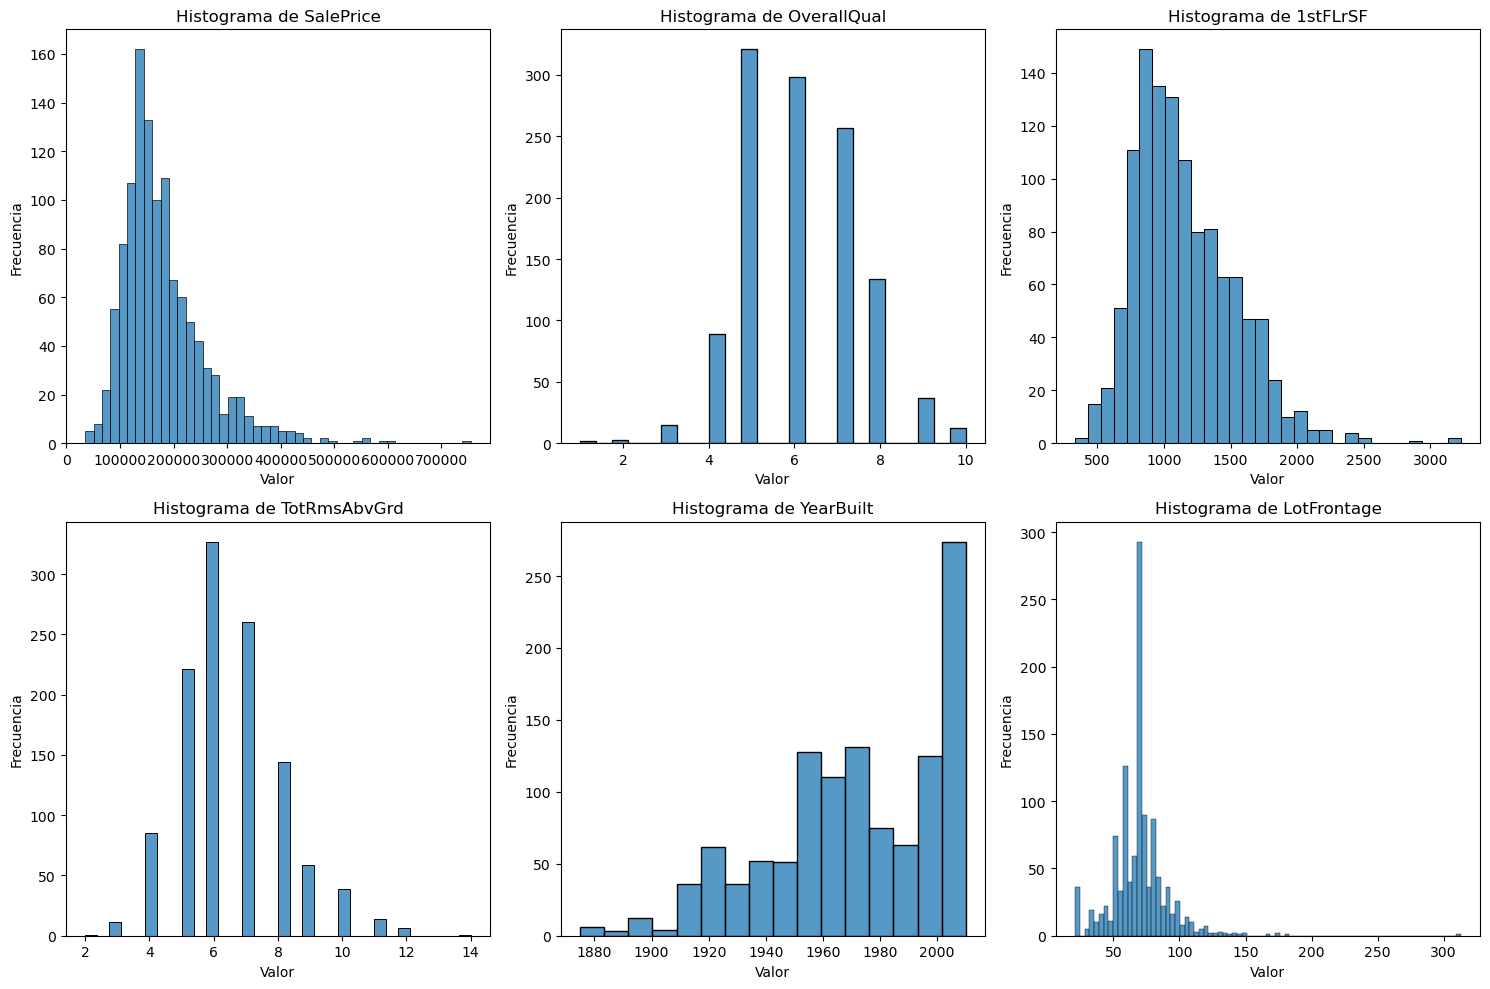

In [53]:

plt.figure(figsize=(15, 10))
for i, column in enumerate(train_df.columns):
    # Crear un subplot para cada variable
    plt.subplot(2, 3, i+1)
    sns.histplot(train_df[column], kde=False)
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()

plt.show()

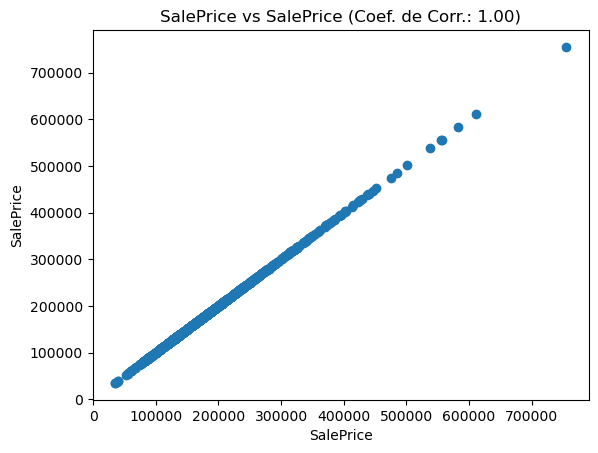

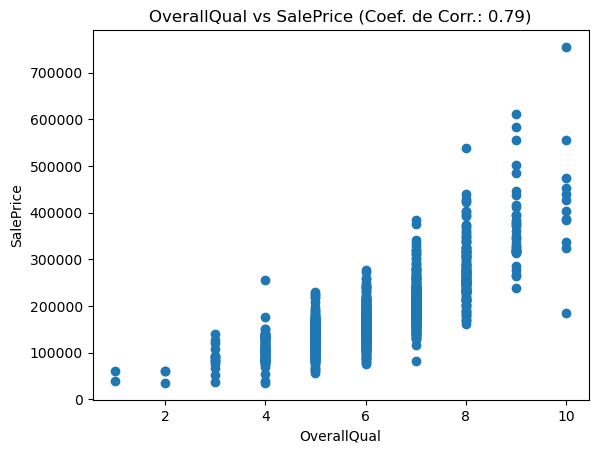

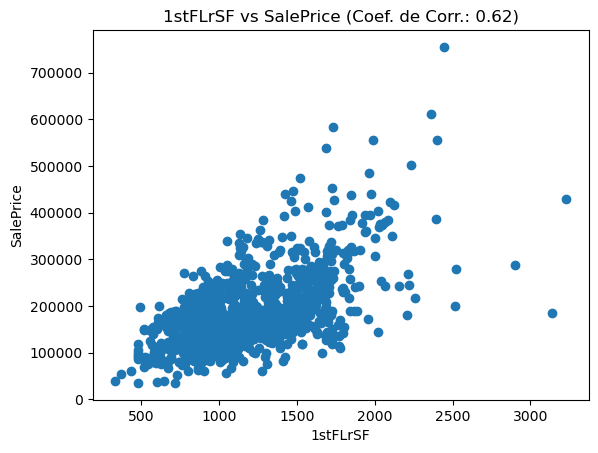

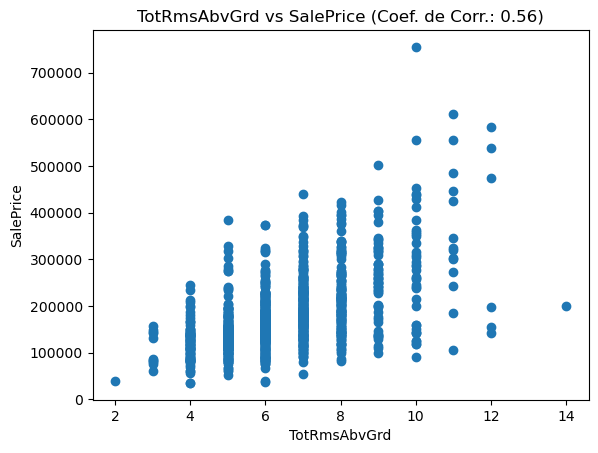

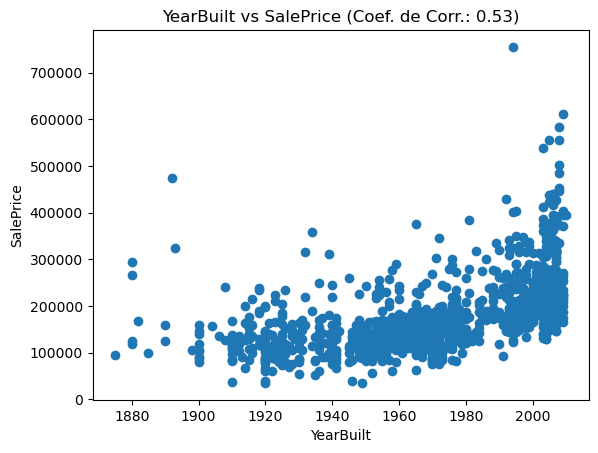

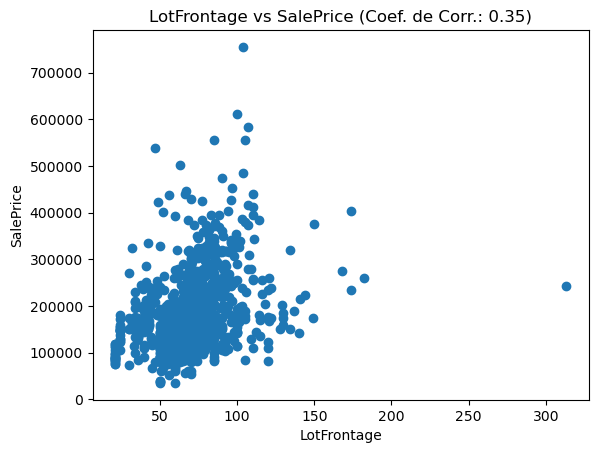

Las variables candidatas para correlacionarlas con SalePrice son OverallQual y 1stFLrSF


In [62]:
def calcular_correlacion_y_graficar(x, y, nombre_variable):
    coef_corr = np.corrcoef(x, y)[0, 1]
    plt.scatter(x, y)
    plt.title(f'{nombre_variable} vs SalePrice (Coef. de Corr.: {coef_corr:.2f})')
    plt.xlabel(nombre_variable)
    plt.ylabel('SalePrice')
    plt.show()
for column in train_df.columns:
    x = train_df[column]
    calcular_correlacion_y_graficar(x, train_df['SalePrice'], column)
    
print(f"Las variables candidatas para correlacionarlas con SalePrice son {variables_seleccionadas[0]} y {variables_seleccionadas[1]}")

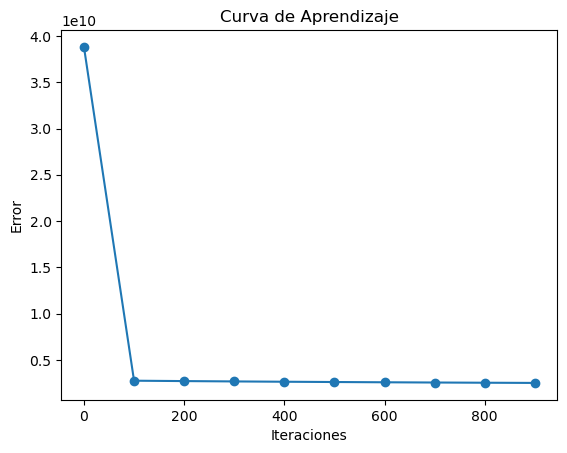

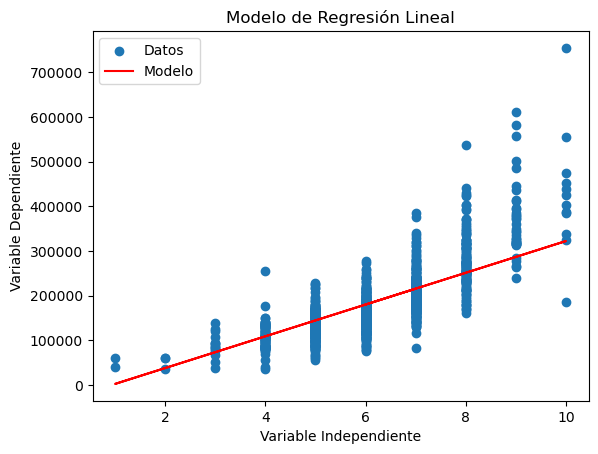

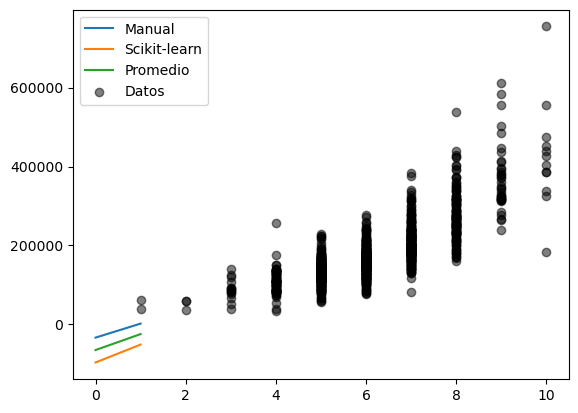

In [63]:
class ModeloRegresionLineal:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.epochs = 1000
        self.imprimir_error_cada = 100
        self.α = 0.01
        self.errores = []
        self.modelos = {}
    
    def entrenar_modelo(self):
        X = np.column_stack((self.x, np.ones_like(self.x)))
        β = np.zeros(2)
        
        for epoch in range(self.epochs):
            ŷ = X.dot(β)
            MSE = np.mean((ŷ - self.y)**2)
            gradient = X.T.dot(ŷ - self.y) / len(self.y)
            β -= self.α * gradient
            
            if epoch % self.imprimir_error_cada == 0:
                self.errores.append(MSE)
        
        self.modelos = {'β0': β[1], 'β1': β[0]}
    
    def graficar_curva_aprendizaje(self):
        plt.plot(range(0, self.epochs, self.imprimir_error_cada), self.errores, marker='o')
        plt.xlabel('Iteraciones')
        plt.ylabel('Error')
        plt.title('Curva de Aprendizaje')
        plt.show()
    
    def graficar_modelo(self):
        plt.scatter(self.x, self.y, label='Datos')
        plt.plot(self.x, self.modelos['β0'] + self.modelos['β1']*self.x, color='red', label='Modelo')
        plt.xlabel('Variable Independiente')
        plt.ylabel('Variable Dependiente')
        plt.title('Modelo de Regresión Lineal')
        plt.legend()
        plt.show()

    def estimar_y(self, x_test):
        y_manual = self.modelos['β0'] + self.modelos['β1']*x_test
        modelo_sklearn = LinearRegression().fit(self.x.reshape(-1, 1), self.y)
        y_sklearn = modelo_sklearn.predict(x_test.reshape(-1, 1))
        y_promedio = (y_manual + y_sklearn) / 2
        return y_manual, y_sklearn, y_promedio

#x = train_df['1stFLrSF'].values
#y = train_df['SalePrice'].values   
x = train_df['OverallQual'].values
y = train_df['SalePrice'].values
# Crear instancia de la clase y entrenar modelo
modelo = ModeloRegresionLineal(x, y)
modelo.entrenar_modelo()

# Graficar curva de aprendizaje
modelo.graficar_curva_aprendizaje()

# Graficar modelo de regresión lineal
modelo.graficar_modelo()

# Estimar y para un conjunto de prueba
x_test = np.linspace(0, 1, 20)
y_manual, y_sklearn, y_promedio = modelo.estimar_y(x_test)

# Graficar estimaciones
plt.plot(x_test, y_manual, label='Manual')
plt.plot(x_test, y_sklearn, label='Scikit-learn')
plt.plot(x_test, y_promedio, label='Promedio')
plt.scatter(x, y, label='Datos', color='black', alpha=0.5)
plt.legend()
plt.show()

In [64]:
class univ_linear_reg():
    def __init__(self, x, y, epochs = 1000, imprimir_error_cada=100, learning_rate = 0.001):
        
        #Capturando los parámetros de la regresión
        self.imprimir_error_cada = imprimir_error_cada
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.x_original = x
        self.vect_ones = np.ones_like(x).reshape(-1,1)
        
        
        #Vectorizando X y Y
        self.xr = np.reshape(x,(-1,1))
        self.xr = np.hstack([self.xr,self.vect_ones])
        self.yr = np.reshape(y, (-1,1))
        
        #inicializando betas  
        self.b0 = np.random.default_rng().normal(np.average(self.x_original), np.std(self.x_original))
        self.b1 = np.random.default_rng().normal(np.average(self.yr), np.std(self.yr))

        self.betas = np.array([[self.b1],[self.b0]])
        
        #inicilizando almacenamiento de errores y modelo
        self.errors = []
        self.models = {}
        
        for i in range(0, self.epochs):
            #Predicciones
            self.y_pred = np.matmul(self.xr, self.betas)
            
            #Calculo del error
            self.e = 1/(2*self.yr.shape[0]) * np.sum((self.yr - self.y_pred)**2)
            self.errors.append(self.e)
            
            #Creando una estructura de datos (diccionario) que almacene los betas, 
            #la y predicha, la y real, y el valor de x sin un array de 1s
            self.models[i] = [self.betas, self.y_pred, self.yr, self.x_original]

            #calculando gradientes
            self.gradient = (1/self.yr.shape[0]) * sum((self.y_pred - self.yr)*self.xr)
            self.mult_gradient = (self.learning_rate*self.gradient)
            self.mult_gradient = self.mult_gradient.reshape((-1,1))

            #Actualizando Betas
            self.betas = self.betas - self.mult_gradient

            #Imprimiendo resultados cada n veces
            if i%self.imprimir_error_cada==0:
                print('Iteración: ', i)
                print('Error: ',self.e)
                print("")
        
    #Función que devuelve la estructura de datos anterior y un array con los errores    
    def trained_models(self):
        return self.models , np.array(self.errors)
    
    #Función que recibe un array x como parámetro y devuelve una y predicha a partir del modelo entrenado
    def predictions(self, x_rp):
        self.x_rp = x_rp
        self.vect_ones_xp = np.ones_like(self.x_rp).reshape(-1,1)
        self.xp = np.reshape(self.x_rp,(-1,1))
        self.xp = np.hstack([self.xp,self.vect_ones_xp])
        self.yp = np.matmul(self.xp, self.betas)
        return self.yp

    #Función que permite calcular los errores entre los valores reales de Y, y los valores predichos
    @staticmethod
    def error_predictions(ypp, ypr):
        ep = 1/(2*ypp.shape[0]) * np.sum((ypr - ypp)**2)
        return ep
    
    #Función/Proceso que gráfica los errorres del modelo. Parametro, un array con los errores del modelo
    @staticmethod
    def error_plot(errors):
        plt.figure(figsize = (7,5))
        plt.plot(errors)
        plt.title("Errores del modelo", fontsize = 12)
        plt.xlabel("Epoch", fontsize = 10)
        plt.ylabel("Errores")
        plt.xticks(fontsize = 10)
        plt.yticks(fontsize = 10)
        plt.show()
        
    ##Función/Proceso que gráfica la evolución del modelo entrenado
    @staticmethod
    def model_plot(models_t,n):
        fig = plt.figure(figsize = (9,6))
        ax =  fig.add_axes([0.1,0.1,0.7,0.7])
        ax.set_title('Comparativa de modelos')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        i = 0
        for k in models_t.keys():
            if k%n == 0 and k != 0:
                ax.scatter(x = models_t[k][3], y = models_t[k][2], color = '#CDCDCD')
                ax.plot(models_t[k][3],  models_t[k][1], linestyle ='solid', color ='#93b5d9')

            if k == max(models_t.keys()):
                ax.plot(models_t[k][3],  models_t[k][1], linestyle ='solid', color ='#0051ff')
                ax.text(max(models_t[k][3]),max(models_t[k][1])+100, 'Modelo '+str(k), fontsize='small')
        plt.show()
        
    #Función/Proceso que gráfica cómo evolucionan los betas en el tiempo (epochs)
    @staticmethod
    def betas_plot(models):
        b0 = []
        b1 = []
        for k in models.keys():
            b1.append(models[k][0][0])
            b0.append(models[k][0][1])
        fig = plt.figure(figsize = (8,5))
        ax =  fig.add_axes([0.1,0.1,0.7,0.7])
        ax.plot(b0)
        ax.plot(b1)
        ax.legend(['B0','B1'])
        ax.set_title('Evolución de Betas')
        ax.set_ylabel('Betas')
        ax.set_xlabel('Epocs')
        
    #Función que recibe como parametros dos modelos entrenados y a partir de ellos predice los valores de una x dada                
    @staticmethod
    def model_comparative(model1, model2 , x):
        #predicciones del modelo propio
        result_m1 = model1.predictions(x)
        #predicciones de sklearn
        result_m2 = model2.predict(x.reshape(-1,1))        
        #promedio de ambos modelos
        avg_result = (result_m1 + result_m2)/2
        return result_m1, result_m2, avg_result
    
    
    #Función/Proceso que recibe una Tupla con las predicciones de model_comparative y los valores reales de y, gráfica el error de cada modelo
    @staticmethod
    def ploting_error_models(modelos, y):
        i = 0
        labels = []
        e_modelos = []
        for r in modelos:
            i +=1
            e_modelos.append(univ_linear_reg.error_predictions(r, y))
            labels.append('Modelo'+str(i) + '\n'+str(round(univ_linear_reg.error_predictions(r, y),0)))
        plt.figure(figsize =(8,5))
        fig, ax = plt.subplots()
        ax.bar(labels, e_modelos)
        fig.tight_layout()
        plt.show()

In [65]:
train_OverallQual = train_df['OverallQual'].values
train_SalePrice = train_df['SalePrice'].values

m1 = univ_linear_reg(train_OverallQual, 
                     train_SalePrice, 
                     6001,1200,0.01)
m1_modelos, m1_errores = m1.trained_models()

""""
m1 = univ_linear_reg(train_OverallQual, 
                     train_SalePrice, 
                     6001,1200,0.01)
m1_modelos, m1_errores = m1.trained_models()  


x = train_df['OverallQual'].values
y = train_df['SalePrice'].values
"""

Iteración:  0
Error:  478959910575.3725

Iteración:  1200
Error:  1187996550.3764105

Iteración:  2400
Error:  1160099162.111937

Iteración:  3600
Error:  1151146710.6234474

Iteración:  4800
Error:  1148273811.3077853

Iteración:  6000
Error:  1147351879.4225864



'"\nm1 = univ_linear_reg(train_OverallQual, \n                     train_SalePrice, \n                     6001,1200,0.01)\nm1_modelos, m1_errores = m1.trained_models()  \n\n\nx = train_df[\'OverallQual\'].values\ny = train_df[\'SalePrice\'].values\n'

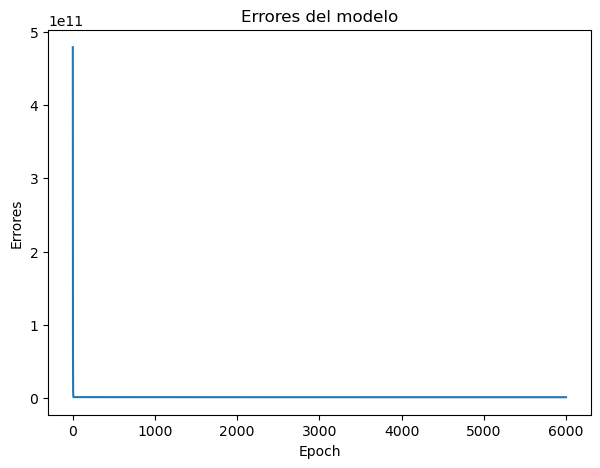

In [69]:
univ_linear_reg.error_plot(m1_errores)

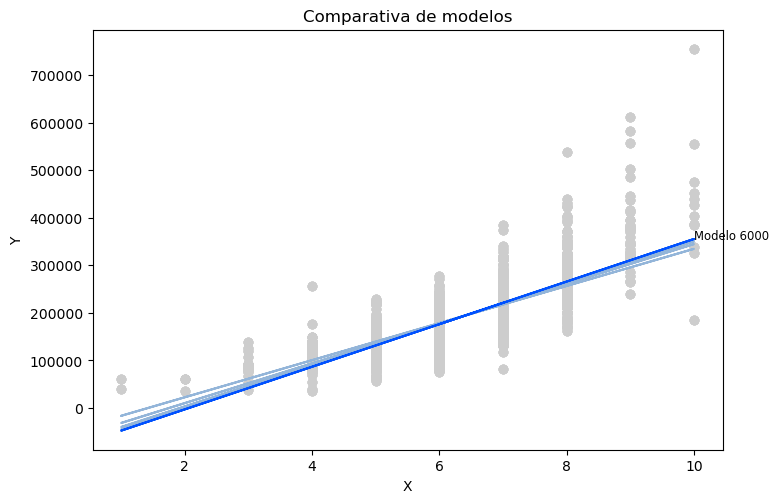

In [71]:
univ_linear_reg.model_plot(m1_modelos, 1200)

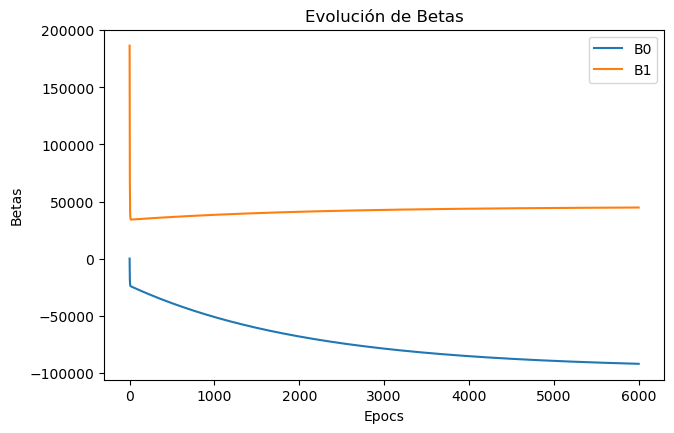

In [72]:
univ_linear_reg.betas_plot(m1_modelos)

### Regresión con 1stFLrSF

In [73]:
train_1stFlrSF = train_df['1stFLrSF'].values


m2 = univ_linear_reg(train_1stFlrSF, 
                     train_SalePrice, 
                     51,10,0.000001)

m2_modelos, m2_errores = m2.trained_models()  

Iteración:  0
Error:  2.1326719862725068e+16

Iteración:  10
Error:  9788534310.658504

Iteración:  20
Error:  1964783335.300099

Iteración:  30
Error:  1964780389.228174

Iteración:  40
Error:  1964780313.3157122

Iteración:  50
Error:  1964780237.4044473



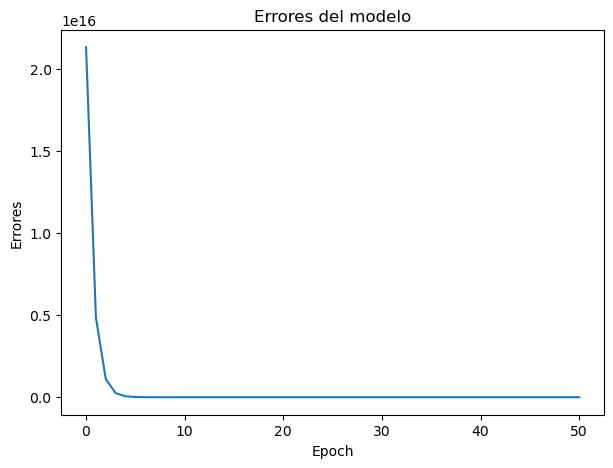

In [74]:
univ_linear_reg.error_plot(m2_errores)

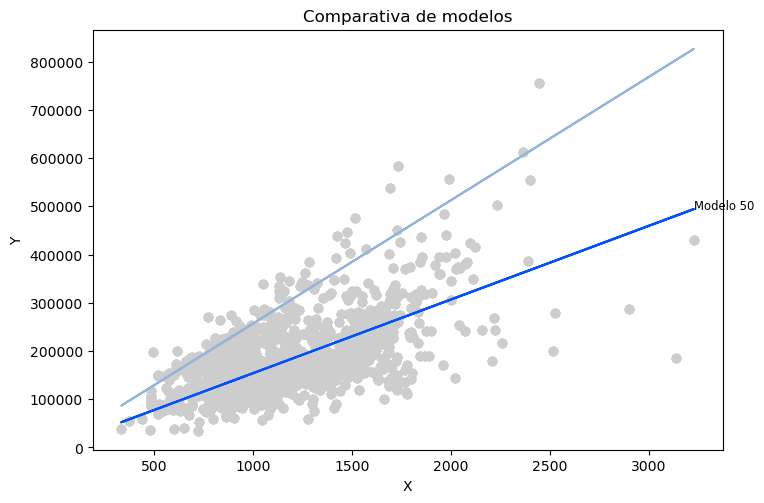

In [75]:
univ_linear_reg.model_plot(m2_modelos, 10)

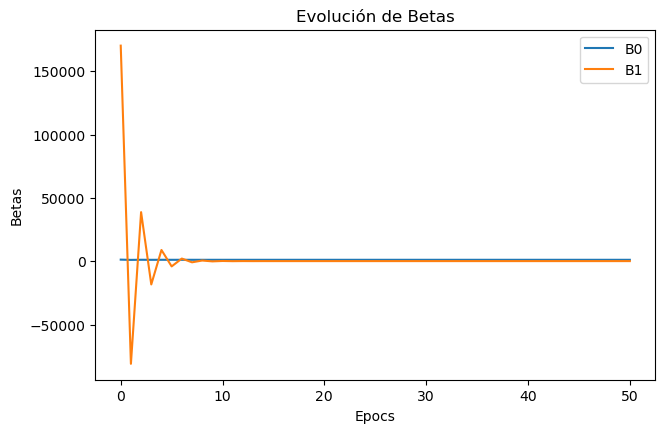

In [76]:
univ_linear_reg.betas_plot(m2_modelos)

## Predicciones del modelo vs. sklearn


### Entrenamiento con sklearn

In [77]:
skm1 = LinearRegression().fit(train_OverallQual.reshape(-1,1), train_SalePrice.reshape(-1,1))
skm2 = LinearRegression().fit(train_1stFlrSF.reshape(-1,1), train_SalePrice.reshape(-1,1))

## Predicciones con modelo propio, sklearn y promedio

In [78]:
test_OverallQual = np.array(test_df['OverallQual'])
test_1stFlrSF = np.array(test_df['1stFLrSF'])
test_SalePrice = np.array(test_df['SalePrice'])

In [79]:
modelos_OverallQual = univ_linear_reg.model_comparative(m1, skm1, test_OverallQual)
modelos_1stFlrSF = univ_linear_reg.model_comparative(m2, skm2, test_1stFlrSF)

<Figure size 800x500 with 0 Axes>

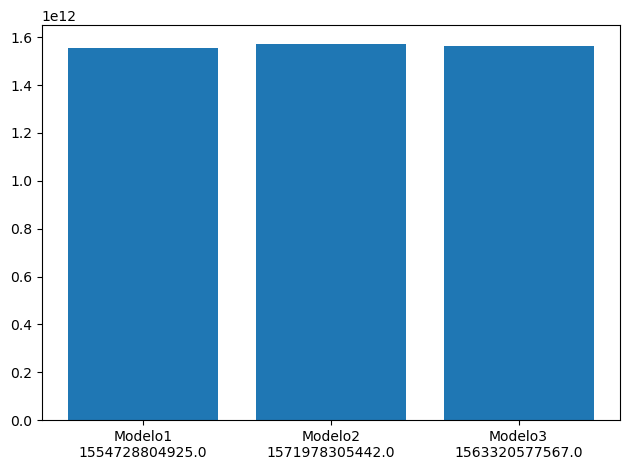

In [80]:
#Compararemos los modelos, Modelo 1 es el Modelo propio, Modelo 2 es el modelo de Sklearn, Modelo 3 es el Modelo promedio
univ_linear_reg.ploting_error_models(modelos_OverallQual, test_SalePrice)

<Figure size 800x500 with 0 Axes>

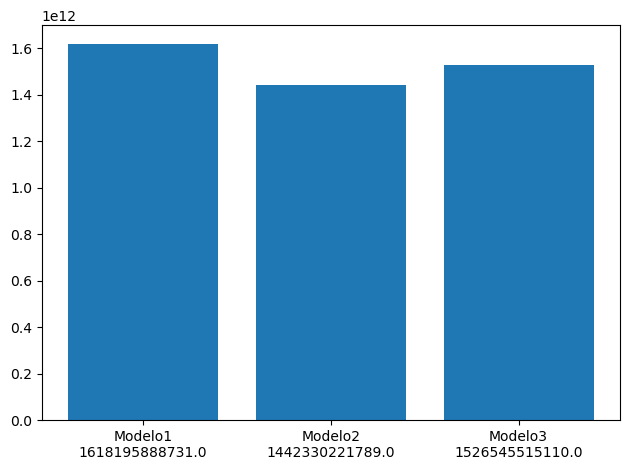

In [81]:
univ_linear_reg.ploting_error_models(modelos_1stFlrSF, test_SalePrice)

# Conclusiones
 ## Con el modelo utiizando OverallQual
         Se observa que tienen un error similar,pero nuestro modelo modelo presenta un menor, leve, pero menor error.
         
 ## Con los modelos creados con 1stFlrSF
         Observamos que el modelo de sklearn tiene un error menor, no tan leve, al modelo que se realizó en el proyecto.